In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Merging Label Shapefiles

In [2]:
iowa_gt = gpd.read_file("/home/hanxli/data/data/IowaNebraska2022_GroundTruthShp/GroundTruthIowa2022.shp")
nbrs_gt = gpd.read_file("/home/hanxli/data/data/IowaNebraska2022_GroundTruthShp/GroundTruthNebraska2022.shp")

In [3]:
iowa_gt.head()

,Id,Category,Shape_Leng,Shape_Area,geometry
0,0,1,NaN,NaN,"POLYGON ((83241.069 2025225.900, 83246.536 202..."
1,0,5,0.0,0.0,"POLYGON ((83416.022 2025245.946, 83818.777 202..."
2,0,1,0.0,0.0,"POLYGON ((83891.674 2025202.208, 84234.290 202..."
3,0,5,0.0,0.0,"POLYGON ((84298.308 2025480.161, 84344.589 202..."
4,0,5,0.0,0.0,"POLYGON ((84296.815 2025860.112, 84359.519 202..."


In [4]:
cdl_crop_names = pd.read_csv("/home/hanxli/data/data/CDL_crop_codes.csv", header=1)
cdl_crop_names = cdl_crop_names.drop(cdl_crop_names.columns[[2,3,4,5,6,7,8,9]], axis=1)
cdl_crop_names.head()

,Codes,Class_Names
0,0,Background
1,1,Corn
2,2,Cotton
3,3,Rice
4,4,Sorghum


In [5]:
for i in range(len(iowa_gt)):
    cat = iowa_gt.loc[i, 'Category']
    iowa_gt.loc[i, 'crop_type'] = cdl_crop_names[cdl_crop_names["Codes"] == cat]["Class_Names"][cat]
iowa_gt = iowa_gt[["Shape_Leng", "Shape_Area","Category","crop_type", "geometry"]]
iowa_gt.head()


,Shape_Leng,Shape_Area,Category,crop_type,geometry
0,NaN,NaN,1,Corn,"POLYGON ((83241.069 2025225.900, 83246.536 202..."
1,0.0,0.0,5,Soybeans,"POLYGON ((83416.022 2025245.946, 83818.777 202..."
2,0.0,0.0,1,Corn,"POLYGON ((83891.674 2025202.208, 84234.290 202..."
3,0.0,0.0,5,Soybeans,"POLYGON ((84298.308 2025480.161, 84344.589 202..."
4,0.0,0.0,5,Soybeans,"POLYGON ((84296.815 2025860.112, 84359.519 202..."


In [6]:
for i in range(len(nbrs_gt)):
    cat = nbrs_gt.loc[i, 'Category']
    nbrs_gt.loc[i, 'crop_type'] = cdl_crop_names[cdl_crop_names["Codes"] == cat]["Class_Names"][cat]

nbrs_gt = nbrs_gt.drop(columns=["Path", "Field"])
nbrs_gt = nbrs_gt[["Shape_Leng", "Shape_Area","Category","crop_type", "geometry"]]
nbrs_gt.head()

,Shape_Leng,Shape_Area,Category,crop_type,geometry
0,0.017045,0.000010,1,Corn,"POLYGON Z ((-97.61542 40.85473 0.00000, -97.61..."
1,0.021140,0.000021,5,Soybeans,"POLYGON Z ((-97.60698 40.85031 0.00000, -97.60..."
2,0.010194,0.000007,1,Corn,"POLYGON Z ((-97.59825 40.83578 0.00000, -97.59..."
3,0.018720,0.000017,5,Soybeans,"POLYGON Z ((-97.60550 40.81265 0.00000, -97.59..."
4,0.026783,0.000045,1,Corn,"POLYGON Z ((-97.60504 40.80698 0.00000, -97.59..."


In [7]:
nbrs_gt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
nbrs_gt = nbrs_gt.to_crs("EPSG:5070")

In [9]:
gdf_new = gpd.GeoDataFrame(pd.concat([iowa_gt, nbrs_gt]))
gdf_new.head()

,Shape_Leng,Shape_Area,Category,crop_type,geometry
0,NaN,NaN,1,Corn,"POLYGON ((83241.069 2025225.900, 83246.536 202..."
1,0.0,0.0,5,Soybeans,"POLYGON ((83416.022 2025245.946, 83818.777 202..."
2,0.0,0.0,1,Corn,"POLYGON ((83891.674 2025202.208, 84234.290 202..."
3,0.0,0.0,5,Soybeans,"POLYGON ((84298.308 2025480.161, 84344.589 202..."
4,0.0,0.0,5,Soybeans,"POLYGON ((84296.815 2025860.112, 84359.519 202..."


In [10]:
np.unique(gdf_new.crop_type)

array(['Alfalfa', 'Corn', 'Developed', 'Fallow/Idle Cropland',
       'Grass/Pasture', 'Soybeans'], dtype=object)

In [11]:
# gdf_new.to_file("/home/hanxli/data/data/merged_labeled.json", driver="GeoJSON")  

### 2022 IowaNebraska Labeled Images

In [14]:
img_data = gpd.read_file("/home/hanxli/data/data/labeled_images/NebraskaIowa2022/gt_img_points.shp")
img_data.head()

,fid,ID,Name,Date,Time,Lon,Lat,Altitude,North,Azimuth,Cam. Maker,Cam. Model,Title,Comment,Path,RelPath,Timestamp,Images,geometry
0,1.0,52a5f3c3-3d1a-4676-a0d3-240e1aa02f29,IMG_0707.jpeg,2022-08-08,17:03:45,-95.779847,39.885558,395.0,T,52.230377,Apple,iPhone 13 Pro Max,NaN,NaN,D:/Download/Sample2022_cropmapping/Sample2022_...,D:\Download\Sample2022_cropmapping\Sample2022_...,2022/08/08 17:03:45.000,"<img src = ""D:\Download\Sample2022_cropmapping...",POINT (18659.597 1874176.038)
1,2.0,dad83ecb-ce56-4bc5-b8f0-928e9c00758d,IMG_0708.jpeg,2022-08-08,17:11:02,-95.781494,39.890914,393.8,T,307.186401,Apple,iPhone 13 Pro Max,NaN,NaN,D:/Download/Sample2022_cropmapping/Sample2022_...,D:\Download\Sample2022_cropmapping\Sample2022_...,2022/08/08 17:11:02.000,"<img src = ""D:\Download\Sample2022_cropmapping...",POINT (18518.603 1874775.817)
2,3.0,32f841cf-2c25-4dab-9574-9b1d492a20ee,IMG_0709.jpeg,2022-08-08,17:11:46,-95.781539,39.902356,406.4,T,71.715881,Apple,iPhone 13 Pro Max,NaN,NaN,D:/Download/Sample2022_cropmapping/Sample2022_...,D:\Download\Sample2022_cropmapping\Sample2022_...,2022/08/08 17:11:46.000,"<img src = ""D:\Download\Sample2022_cropmapping...",POINT (18511.889 1876057.866)
3,4.0,aa7a1a52-cb32-4619-92bc-6fef7f001633,IMG_0710.jpeg,2022-08-08,17:12:20,-95.785028,39.911469,392.7,T,64.621063,Apple,iPhone 13 Pro Max,NaN,NaN,D:/Download/Sample2022_cropmapping/Sample2022_...,D:\Download\Sample2022_cropmapping\Sample2022_...,2022/08/08 17:12:20.000,"<img src = ""D:\Download\Sample2022_cropmapping...",POINT (18213.939 1877078.413)
4,5.0,29f58bc7-0757-4bfb-9c14-188fa9c9d01d,IMG_0711.jpeg,2022-08-08,17:12:42,-95.787506,39.917039,375.7,T,51.899292,Apple,iPhone 13 Pro Max,NaN,NaN,D:/Download/Sample2022_cropmapping/Sample2022_...,D:\Download\Sample2022_cropmapping\Sample2022_...,2022/08/08 17:12:42.000,"<img src = ""D:\Download\Sample2022_cropmapping...",POINT (18002.609 1877702.002)


In [15]:
img_data_comp = img_data[["Name", "Timestamp", "Azimuth", "geometry"]]
img_data_comp.head()

,Name,Timestamp,Azimuth,geometry
0,IMG_0707.jpeg,2022/08/08 17:03:45.000,52.230377,POINT (18659.597 1874176.038)
1,IMG_0708.jpeg,2022/08/08 17:11:02.000,307.186401,POINT (18518.603 1874775.817)
2,IMG_0709.jpeg,2022/08/08 17:11:46.000,71.715881,POINT (18511.889 1876057.866)
3,IMG_0710.jpeg,2022/08/08 17:12:20.000,64.621063,POINT (18213.939 1877078.413)
4,IMG_0711.jpeg,2022/08/08 17:12:42.000,51.899292,POINT (18002.609 1877702.002)


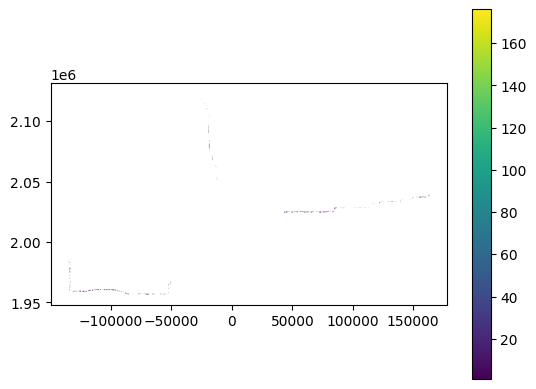

In [ ]:
ax = gdf_new.plot("Category", legend=True)
# img_data_comp.plot(ax = ax, color="red")

In [16]:
labeled_imgs = img_data_comp.sjoin_nearest(gdf_new, how="inner", max_distance=100, distance_col="distance")

In [17]:
labeled_imgs = labeled_imgs[["Name", "Timestamp", "Azimuth", "Category", "crop_type", "distance", "geometry"]]
labeled_imgs.head()

,Name,Timestamp,Azimuth,Category,crop_type,distance,geometry
587,IMG_1304.jpeg,2022/08/09 13:54:08.000,154.242096,1,Corn,53.910780,POINT (-134842.932 1983715.338)
588,IMG_1305.jpeg,2022/08/09 13:54:12.000,155.240669,1,Corn,43.487002,POINT (-134605.805 1983561.357)
589,IMG_1306.jpeg,2022/08/09 13:54:20.000,143.227947,5,Soybeans,71.219255,POINT (-134401.764 1983428.477)
590,IMG_1307.jpeg,2022/08/09 14:48:06.000,127.436863,5,Soybeans,35.656663,POINT (-134291.470 1983356.611)
591,IMG_1308.jpeg,2022/08/09 13:54:27.000,125.028267,5,Soybeans,35.762771,POINT (-134213.105 1983306.130)


In [ ]:
# labeled_imgs.to_file("/home/hanxli/data/data/labeled_imgs.json", driver="GeoJSON")  

### 2023 Nebraska Labeled Images

In [18]:
nbrs_2023_gt = gpd.read_file("/home/hanxli/data/data/Nebraska2023_in_season/In_season_2023_gt/Nebraska2023groundtruth.shp")
nbrs_2023_gt.head()


,Id,label,geometry
0,0,1,"POLYGON ((-89520.218 2168884.235, -89420.727 2..."
1,0,1,"POLYGON ((-89398.116 2168402.609, -89398.116 2..."
2,0,0,"POLYGON ((-89413.944 2167826.015, -89492.975 2..."
3,0,1,"POLYGON ((-89442.208 2164547.342, -89589.878 2..."
4,0,0,"POLYGON ((-89590.178 2158814.548, -89520.619 2..."


In [19]:
for i in range(len(nbrs_2023_gt)):
    cat = nbrs_2023_gt.loc[i, 'label']
    nbrs_2023_gt.loc[i, 'crop_type'] = cdl_crop_names[cdl_crop_names["Codes"] == cat]["Class_Names"][cat]


nbrs_2023_gt = nbrs_2023_gt[["label","crop_type", "geometry"]].rename(columns ={'label':'Category'})
nbrs_2023_gt.head()

,Category,crop_type,geometry
0,1,Corn,"POLYGON ((-89520.218 2168884.235, -89420.727 2..."
1,1,Corn,"POLYGON ((-89398.116 2168402.609, -89398.116 2..."
2,0,Background,"POLYGON ((-89413.944 2167826.015, -89492.975 2..."
3,1,Corn,"POLYGON ((-89442.208 2164547.342, -89589.878 2..."
4,0,Background,"POLYGON ((-89590.178 2158814.548, -89520.619 2..."


In [21]:
img_data_2023 = gpd.read_file("/home/hanxli/data/data/labeled_images/NebraskaIowa2023_inseason/gt_img_points_2023.shp")
img_data_2023.head()

,fid,ID,Name,Date,Time,Lon,Lat,Altitude,North,Azimuth,Cam. Maker,Cam. Model,Title,Comment,Path,RelPath,Timestamp,Images,geometry
0,1.0,61a94111-4b31-4e6c-a11a-abbd070cebdf,IMG_0554.JPG,2023-10-13,10:33:58,-96.339256,41.323233,355.593635,T,323.583405,Apple,iPhone 13 Pro Max,NaN,NaN,D:/CSISS/roadside_crop_labeling/data/Nebraska2...,Nebraska2023_in_season\MiddleWest2023\IMG_0554...,2023/10/13 10:33:58.000,"<img src = ""Nebraska2023_in_season\MiddleWest2...",POINT (-28179.577 2035229.894)
1,2.0,960abe56-7710-4571-90e0-f67da5d573ff,IMG_0561.JPG,2023-10-13,10:34:53,-96.353653,41.334450,357.921466,T,347.299622,Apple,iPhone 13 Pro Max,NaN,NaN,D:/CSISS/roadside_crop_labeling/data/Nebraska2...,Nebraska2023_in_season\MiddleWest2023\IMG_0561...,2023/10/13 10:34:53.000,"<img src = ""Nebraska2023_in_season\MiddleWest2...",POINT (-29370.775 2036489.857)
2,3.0,bded98f6-5d98-4478-a575-f6f93ba6004e,IMG_0626.JPG,2023-10-13,10:39:52,-96.434403,41.385719,366.451643,T,341.454117,Apple,iPhone 13 Pro Max,NaN,NaN,D:/CSISS/roadside_crop_labeling/data/Nebraska2...,Nebraska2023_in_season\MiddleWest2023\IMG_0626...,2023/10/13 10:39:52.000,"<img src = ""Nebraska2023_in_season\MiddleWest2...",POINT (-36050.767 2042256.616)
3,4.0,0a8fbc1c-4fa2-452b-95cb-6902fa8043ff,IMG_0627.JPG,2023-10-13,10:39:53,-96.434936,41.386158,366.868182,T,338.830948,Apple,iPhone 13 Pro Max,NaN,NaN,D:/CSISS/roadside_crop_labeling/data/Nebraska2...,Nebraska2023_in_season\MiddleWest2023\IMG_0627...,2023/10/13 10:39:53.000,"<img src = ""Nebraska2023_in_season\MiddleWest2...",POINT (-36094.803 2042305.946)
4,5.0,835f403e-b352-46f6-9f95-e98eb74a5619,IMG_0792.JPG,2023-10-13,10:58:42,-96.511444,41.594292,402.577637,T,274.855896,Apple,iPhone 13 Pro Max,NaN,NaN,D:/CSISS/roadside_crop_labeling/data/Nebraska2...,Nebraska2023_in_season\MiddleWest2023\IMG_0792...,2023/10/13 10:58:42.000,"<img src = ""Nebraska2023_in_season\MiddleWest2...",POINT (-42318.709 2065632.363)


In [22]:
img_data_comp_2023 = img_data_2023[["Name","Timestamp","North","Azimuth","geometry"]]
img_data_comp_2023.head()

,Name,Timestamp,North,Azimuth,geometry
0,IMG_0554.JPG,2023/10/13 10:33:58.000,T,323.583405,POINT (-28179.577 2035229.894)
1,IMG_0561.JPG,2023/10/13 10:34:53.000,T,347.299622,POINT (-29370.775 2036489.857)
2,IMG_0626.JPG,2023/10/13 10:39:52.000,T,341.454117,POINT (-36050.767 2042256.616)
3,IMG_0627.JPG,2023/10/13 10:39:53.000,T,338.830948,POINT (-36094.803 2042305.946)
4,IMG_0792.JPG,2023/10/13 10:58:42.000,T,274.855896,POINT (-42318.709 2065632.363)


In [23]:
labeled_imgs_2023 = img_data_comp_2023.sjoin_nearest(nbrs_2023_gt, how="inner", max_distance=100, distance_col="distance")

In [24]:
labeled_imgs_2023 = labeled_imgs_2023[["Name", "Timestamp", "Azimuth", "Category", "crop_type", "distance", "geometry"]]
labeled_imgs_2023.head()

,Name,Timestamp,Azimuth,Category,crop_type,distance,geometry
250,IMG_1929.JPG,2023/10/13 16:37:11.000,199.114967,1,Corn,62.897248,POINT (-89358.038 2168869.260)
251,IMG_1931.JPG,2023/10/13 16:37:23.000,184.824402,1,Corn,27.064178,POINT (-89371.052 2168389.303)
252,IMG_1934.JPG,2023/10/13 16:37:38.000,186.933922,0,Background,29.647468,POINT (-89384.369 2167823.944)
253,IMG_1946.JPG,2023/10/13 16:39:11.000,195.168373,1,Corn,39.405771,POINT (-89402.829 2164545.911)
254,IMG_1947.JPG,2023/10/13 16:39:13.000,186.032021,5,Soybeans,52.747643,POINT (-89401.322 2164459.867)


In [ ]:
# labeled_imgs_2023.to_file("/home/hanxli/data/data/labeled_imgs_2023.json", driver="GeoJSON")

### Merging all Labeled Images (2022, 2023, ESA GSV)

#### Merge CSISS Labels (2022-2023)

In [17]:
gdf_2022 = gpd.read_file("/home/hanxli/data/data/labeled_imgs.json", driver='GeoJSON')
gdf_2023 = gpd.read_file("/home/hanxli/data/data/labeled_imgs_2023.json", driver='GeoJSON')
    

In [18]:
gdf_2022.head()

,Name,Timestamp,Azimuth,Category,crop_type,distance,save_path,geometry
0,IMG_2022_001.jpg,2022-08-09 13:54:08,154.242096,1,Corn,53.910780,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134842.932 1983715.338)
1,IMG_2022_002.jpg,2022-08-09 13:54:12,155.240669,1,Corn,43.487002,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134605.805 1983561.357)
2,IMG_2022_003.jpg,2022-08-09 13:54:20,143.227947,5,Soybeans,71.219255,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134401.764 1983428.477)
3,IMG_2022_004.jpg,2022-08-09 14:48:06,127.436863,5,Soybeans,35.656663,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134291.470 1983356.611)
4,IMG_2022_005.jpg,2022-08-09 13:54:27,125.028267,5,Soybeans,35.762771,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134213.105 1983306.130)


In [19]:
gdf_2023.head()

,Name,Timestamp,Azimuth,Category,crop_type,distance,save_path,geometry
0,IMG_2023_001.jpg,2023-10-13 16:37:11,199.114967,1,Corn,62.897248,/home/hanxli/data/data/all_sv_imgs/IMG_2023_00...,POINT (-89358.038 2168869.260)
1,IMG_2023_002.jpg,2023-10-13 16:37:23,184.824402,1,Corn,27.064178,/home/hanxli/data/data/all_sv_imgs/IMG_2023_00...,POINT (-89371.052 2168389.303)
2,IMG_2023_003.jpg,2023-10-13 16:37:38,186.933922,0,Background,29.647468,/home/hanxli/data/data/all_sv_imgs/IMG_2023_00...,POINT (-89384.369 2167823.944)
3,IMG_2023_004.jpg,2023-10-13 16:39:11,195.168373,1,Corn,39.405771,/home/hanxli/data/data/all_sv_imgs/IMG_2023_00...,POINT (-89402.829 2164545.911)
4,IMG_2023_005.jpg,2023-10-13 16:39:13,186.032021,5,Soybeans,52.747643,/home/hanxli/data/data/all_sv_imgs/IMG_2023_00...,POINT (-89401.322 2164459.867)


In [20]:
def print_common_elements(array1, array2):
    common_elements = set(array1) & set(array2)
    if len(common_elements) != 0:
        for element in common_elements:
            print(element)
    else:
        print("No matching elements")

In [21]:
print_common_elements(np.unique(gdf_2022.Name), np.unique(gdf_2023.Name))

No matching elements


In [22]:
labeled_imgs_all = gpd.GeoDataFrame(pd.concat([gdf_2022, gdf_2023])).reset_index(drop=True)
labeled_imgs_all.head()

,Name,Timestamp,Azimuth,Category,crop_type,distance,save_path,geometry
0,IMG_2022_001.jpg,2022-08-09 13:54:08,154.242096,1,Corn,53.910780,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134842.932 1983715.338)
1,IMG_2022_002.jpg,2022-08-09 13:54:12,155.240669,1,Corn,43.487002,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134605.805 1983561.357)
2,IMG_2022_003.jpg,2022-08-09 13:54:20,143.227947,5,Soybeans,71.219255,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134401.764 1983428.477)
3,IMG_2022_004.jpg,2022-08-09 14:48:06,127.436863,5,Soybeans,35.656663,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134291.470 1983356.611)
4,IMG_2022_005.jpg,2022-08-09 13:54:27,125.028267,5,Soybeans,35.762771,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134213.105 1983306.130)


In [23]:
# labeled_imgs_all.to_file("/home/hanxli/data/data/iowa_nebraska_labeled_imgs.json", driver="GeoJSON")

#### Merge CSISS Labels with ESA Labels

In [11]:
labeled_imgs_all = gpd.read_file("/home/hanxli/data/data/iowa_nebraska_labeled_imgs_filtered_reclass.json", driver='GeoJSON')
esa_gsv_img = gpd.read_file("/home/hanxli/data/data/esa_gsv_imgs_filtered_reclass.json", driver='GeoJSON')


In [12]:
labeled_imgs_all.head()

,Name,Timestamp,Azimuth,Category,crop_type,distance,save_path,blur,geometry
0,IMG_2022_001.jpg,2022-08-09 13:54:08,154.242096,1,Maize,53.910780,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,320.966214,POINT (-134842.932 1983715.338)
1,IMG_2022_003.jpg,2022-08-09 13:54:20,143.227947,5,Soybean,71.219255,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,23.162761,POINT (-134401.764 1983428.477)
2,IMG_2022_004.jpg,2022-08-09 14:48:06,127.436863,5,Soybean,35.656663,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,325.285711,POINT (-134291.470 1983356.611)
3,IMG_2022_006.jpg,2022-08-09 14:48:09,94.960558,5,Soybean,35.759536,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,325.162918,POINT (-133973.182 1983151.187)
4,IMG_2022_007.jpg,2022-08-09 13:55:58,173.238594,1,Maize,28.213533,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,164.787409,POINT (-133639.877 1981696.371)


In [13]:
esa_gsv_img.head()

,img_name,date,crop_type,lat,lon,save_path,blur,geometry
0,IMG_2021_0001.jpg,7/15/2021 12:00:00,Wheat,50.671654,4.355668,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,1452.703464,POINT (5969005.785 6552483.731)
1,IMG_2021_0002.jpg,7/15/2021 12:00:00,Other,50.682726,4.362579,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,9943.006029,POINT (5968201.112 6553511.790)
2,IMG_2021_0003.jpg,7/15/2021 12:00:00,Other,50.685627,4.357229,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,1398.006565,POINT (5967735.880 6553331.501)
3,IMG_2021_0004.jpg,3/15/2021 12:00:00,Maize,-17.933771,31.018454,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,290.650034,POINT (13488145.378 6710576.323)
4,IMG_2021_0005.jpg,9/15/2021 12:00:00,Other,51.725312,-8.491264,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,2449.420077,POINT (5368344.540 5848122.011)


In [14]:
esa_gsv_img['timestamp'] = pd.to_datetime(esa_gsv_img['date'], format='%m/%d/%Y %H:%M:%S')

In [15]:
esa_gsv_img.head()

,img_name,date,crop_type,lat,lon,save_path,blur,geometry,timestamp
0,IMG_2021_0001.jpg,7/15/2021 12:00:00,Wheat,50.671654,4.355668,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,1452.703464,POINT (5969005.785 6552483.731),2021-07-15 12:00:00
1,IMG_2021_0002.jpg,7/15/2021 12:00:00,Other,50.682726,4.362579,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,9943.006029,POINT (5968201.112 6553511.790),2021-07-15 12:00:00
2,IMG_2021_0003.jpg,7/15/2021 12:00:00,Other,50.685627,4.357229,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,1398.006565,POINT (5967735.880 6553331.501),2021-07-15 12:00:00
3,IMG_2021_0004.jpg,3/15/2021 12:00:00,Maize,-17.933771,31.018454,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,290.650034,POINT (13488145.378 6710576.323),2021-03-15 12:00:00
4,IMG_2021_0005.jpg,9/15/2021 12:00:00,Other,51.725312,-8.491264,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,2449.420077,POINT (5368344.540 5848122.011),2021-09-15 12:00:00


In [16]:
labeled_imgs_all = labeled_imgs_all[["Name", "Timestamp", "crop_type", "save_path", "geometry"]].rename(columns ={'Name':'img_name', 'Timestamp': 'timestamp'})
labeled_imgs_all.head()

,img_name,timestamp,crop_type,save_path,geometry
0,IMG_2022_001.jpg,2022-08-09 13:54:08,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134842.932 1983715.338)
1,IMG_2022_003.jpg,2022-08-09 13:54:20,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134401.764 1983428.477)
2,IMG_2022_004.jpg,2022-08-09 14:48:06,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134291.470 1983356.611)
3,IMG_2022_006.jpg,2022-08-09 14:48:09,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133973.182 1983151.187)
4,IMG_2022_007.jpg,2022-08-09 13:55:58,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133639.877 1981696.371)


In [17]:
esa_gsv_img = esa_gsv_img[["img_name", "timestamp", "crop_type", "save_path", "geometry"]]
esa_gsv_img.head()

,img_name,timestamp,crop_type,save_path,geometry
0,IMG_2021_0001.jpg,2021-07-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,POINT (5969005.785 6552483.731)
1,IMG_2021_0002.jpg,2021-07-15 12:00:00,Other,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,POINT (5968201.112 6553511.790)
2,IMG_2021_0003.jpg,2021-07-15 12:00:00,Other,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,POINT (5967735.880 6553331.501)
3,IMG_2021_0004.jpg,2021-03-15 12:00:00,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,POINT (13488145.378 6710576.323)
4,IMG_2021_0005.jpg,2021-09-15 12:00:00,Other,/home/hanxli/data/data/all_sv_imgs/IMG_2021_00...,POINT (5368344.540 5848122.011)


In [18]:
np.unique(labeled_imgs_all.crop_type, return_counts=True)

(array(['Maize', 'Other', 'Soybean'], dtype=object), array([487, 112, 282]))

In [4]:
def plot_bar(df, title):
    temp = np.unique(df.crop_type, return_counts=True)
    total_count = np.sum(temp[1])
    percentage = [count / total_count * 100 for count in temp[1]]
    fig = plt.figure(figsize=(10,5))
    plt.xticks(rotation = 25)
    graph = plt.bar(temp[0], temp[1])

    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                y+height*1.01,
                str(round(percentage[i], 2))+'%',
                ha='center',
                weight='bold')
        i+=1
    plt.title(title)
    plt.show()


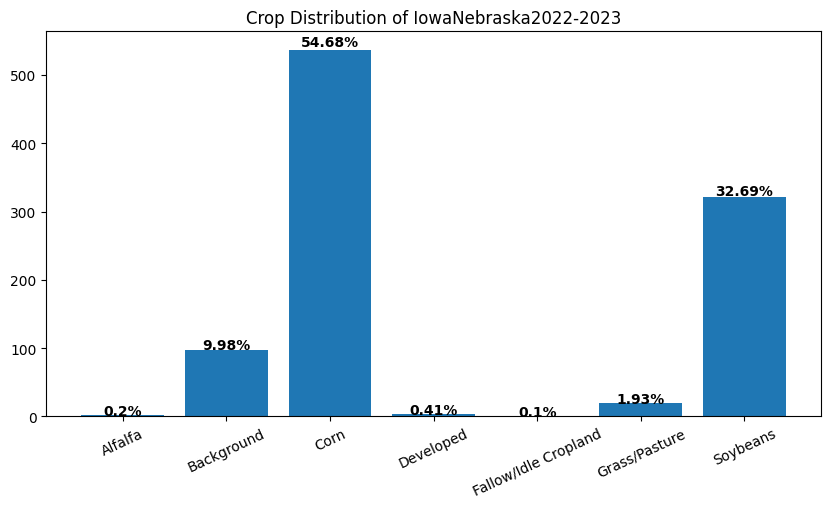

In [48]:
plot_bar(labeled_imgs_all, "Crop Distribution of IowaNebraska2022-2023")

In [9]:
labeled_imgs_filtered = gpd.read_file("/home/hanxli/data/data/iowa_nebraska_labeled_imgs_filtered_reclass.json", driver='GeoJSON')
esa_gsv_img_filtered = gpd.read_file("/home/hanxli/data/data/esa_gsv_imgs_filtered_reclass.json", driver='GeoJSON')


In [ ]:
labeled_imgs_filtered

In [ ]:
esa_gsv_img_filtered

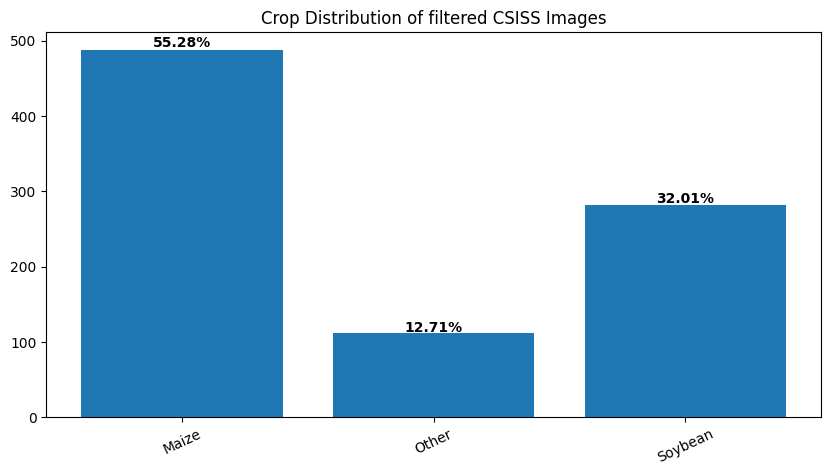

In [7]:
plot_bar(labeled_imgs_filtered, "Crop Distribution of filtered CSISS Images")

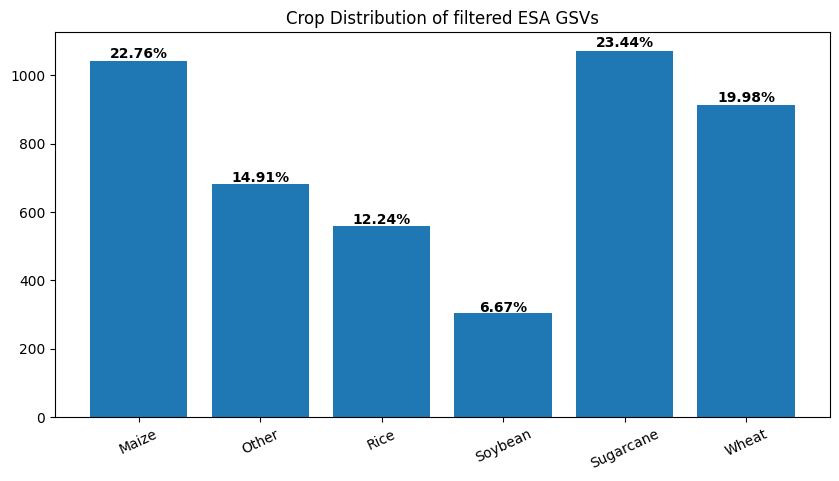

In [10]:
plot_bar(esa_gsv_img_filtered, "Crop Distribution of filtered ESA GSVs")

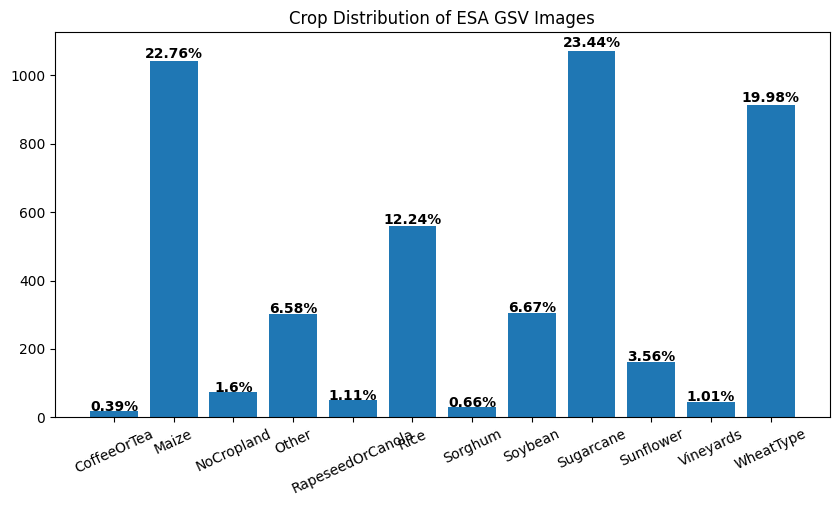

In [49]:
plot_bar(esa_gsv_img, "Crop Distribution of ESA GSV Images")

In [19]:
imgs = gpd.GeoDataFrame(pd.concat([labeled_imgs_all, esa_gsv_img])).reset_index(drop=True)
imgs.head

,img_name,timestamp,crop_type,save_path,geometry
0,IMG_2022_001.jpg,2022-08-09 13:54:08,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134842.932 1983715.338)
1,IMG_2022_003.jpg,2022-08-09 13:54:20,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134401.764 1983428.477)
2,IMG_2022_004.jpg,2022-08-09 14:48:06,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134291.470 1983356.611)
3,IMG_2022_006.jpg,2022-08-09 14:48:09,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133973.182 1983151.187)
4,IMG_2022_007.jpg,2022-08-09 13:55:58,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133639.877 1981696.371)


In [25]:
imgs

,img_name,timestamp,crop_type,save_path,geometry
0,IMG_2022_001.jpg,2022-08-09 13:54:08,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134842.932 1983715.338)
1,IMG_2022_003.jpg,2022-08-09 13:54:20,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134401.764 1983428.477)
2,IMG_2022_004.jpg,2022-08-09 14:48:06,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134291.470 1983356.611)
3,IMG_2022_006.jpg,2022-08-09 14:48:09,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133973.182 1983151.187)
4,IMG_2022_007.jpg,2022-08-09 13:55:58,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133639.877 1981696.371)
...,...,...,...,...,...
5450,IMG_2021_4570.jpg,2021-07-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_45...,POINT (5332304.898 6413964.015)
5451,IMG_2021_4571.jpg,2021-06-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_45...,POINT (5562717.000 6361439.702)
5452,IMG_2021_4572.jpg,2021-08-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_45...,POINT (5487568.873 6375263.468)
5453,IMG_2021_4573.jpg,2021-05-15 12:00:00,Wheat,/home/hanxli/data/data/all_sv_imgs/IMG_2021_45...,POINT (5404693.707 6403138.154)


In [52]:
# reclassify = {"CoffeeOrTea": "Other",
#               "RapeseedOrCanola": "Other",
#               "Vineyards": "Other",
#               "WheatType": "Wheat",
#               "Sunflower": "Other",
#               "Alfalfa": "Other",
#               "Background": "Other",
#               "Developed": "Other",
#               "Fallow/Idle Cropland": "Other",
#               "Grass/Pasture": "Other",
#               "Soybeans": "Soybean"}

In [53]:
reclassify = {"CoffeeOrTea": "Other",
            "RapeseedOrCanola": "Other",
            "Vineyards": "Other",
            "WheatType": "Wheat",
            "Sunflower": "Other",
            "Alfalfa": "Other",
            "Background": "Other",
            "Developed": "Other",
            "Fallow/Idle Cropland": "Other",
            "Grass/Pasture": "Other",
            "Soybeans": "Soybean",
            "NoCropland": "Other",
            "Sorghum": "Other",
            "Corn": "Maize"}

In [54]:
for i in range(len(imgs)):
    crop_type = imgs.loc[i, "crop_type"]
    if crop_type in reclassify:
        imgs.loc[i, "crop_type"] = reclassify[crop_type]

In [21]:
imgs.head()

,img_name,timestamp,crop_type,save_path,geometry
0,IMG_2022_001.jpg,2022-08-09 13:54:08,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134842.932 1983715.338)
1,IMG_2022_003.jpg,2022-08-09 13:54:20,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134401.764 1983428.477)
2,IMG_2022_004.jpg,2022-08-09 14:48:06,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134291.470 1983356.611)
3,IMG_2022_006.jpg,2022-08-09 14:48:09,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133973.182 1983151.187)
4,IMG_2022_007.jpg,2022-08-09 13:55:58,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133639.877 1981696.371)


In [22]:
imgs.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
imgs.to_csv("/home/hanxli/data/data/all_label_images_filtered_reclasses.csv", sep=',', index=False, header=True)

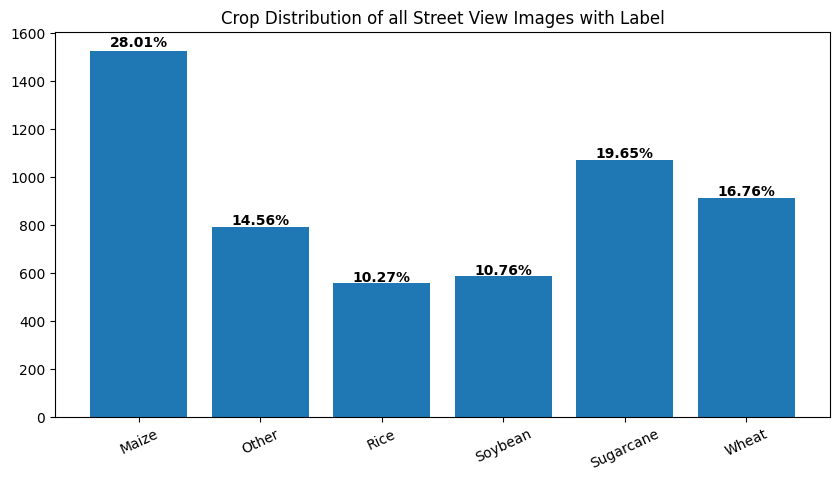

In [24]:
plot_bar(imgs, "Crop Distribution of all Street View Images with Label")

### Spatial Inspection

In [26]:
world_boundaries = gpd.read_file("/home/hanxli/data/data/world-administrative-boundaries.geojson", driver='GeoJSON')


In [27]:
world_boundaries = world_boundaries[["name","iso3","geometry"]]
world_boundaries

,name,iso3,geometry
0,Northern Mariana Islands,MNP,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ..."
1,Kuril Islands,NaN,"MULTIPOLYGON (((146.68274 43.70777, 146.66664 ..."
2,France,FRA,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6..."
3,Serbia,SRB,"POLYGON ((20.26102 46.11485, 20.31403 46.06986..."
4,Uruguay,URY,"POLYGON ((-53.37430 -33.74067, -53.39917 -33.7..."
...,...,...,...
251,Slovakia,SVK,"POLYGON ((22.55805 49.07944, 22.55166 49.03943..."
252,Mali,MLI,"POLYGON ((-4.80611 25.00027, -4.52528 24.82500..."
253,Armenia,ARM,"POLYGON ((46.54038 38.87559, 46.51639 38.87804..."
254,Albania,ALB,"POLYGON ((20.07142 42.56091, 20.10208 42.53347..."


In [28]:
world_boundaries = world_boundaries.to_crs(imgs.crs)
world_boundaries.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
imgs_with_countries = imgs.sjoin(world_boundaries, how='inner', predicate='intersects')
imgs_with_countries.head()

,img_name,timestamp,crop_type,save_path,geometry,index_right,name,iso3
0,IMG_2022_001.jpg,2022-08-09 13:54:08,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134842.932 1983715.338),96,United States of America,USA
1,IMG_2022_003.jpg,2022-08-09 13:54:20,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134401.764 1983428.477),96,United States of America,USA
2,IMG_2022_004.jpg,2022-08-09 14:48:06,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-134291.470 1983356.611),96,United States of America,USA
3,IMG_2022_006.jpg,2022-08-09 14:48:09,Soybean,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133973.182 1983151.187),96,United States of America,USA
4,IMG_2022_007.jpg,2022-08-09 13:55:58,Maize,/home/hanxli/data/data/all_sv_imgs/IMG_2022_00...,POINT (-133639.877 1981696.371),96,United States of America,USA


In [30]:
name, counts = np.unique(imgs_with_countries.name, return_counts=True)

count_dict = dict(zip(name, counts))

total_counts = np.sum(list(count_dict.values()))
temp_dict = {}

for item in count_dict:
    temp_dict[item] = round((count_dict[item] / total_counts * 100), 2)

temp_dict
worlds_df = pd.DataFrame(temp_dict.items(), columns=["Country", "Percentage"])

for item in count_dict:
    worlds_df.loc[worlds_df.Country == item, "img_counts"] = count_dict[item]

worlds_df = worlds_df.sort_values(by='Percentage', ascending=False).reset_index(drop=True)
worlds_df

,Country,Percentage,img_counts
0,Brazil,33.28,1813.0
1,United States of America,19.07,1039.0
2,Russian Federation,9.90,539.0
3,Australia,3.30,180.0
4,Indonesia,2.79,152.0
...,...,...,...
77,Jordan,0.02,1.0
78,Finland,0.02,1.0
79,Iran (Islamic Republic of),0.02,1.0
80,Georgia,0.02,1.0


In [31]:
imgs_within_USA = imgs_with_countries[imgs_with_countries["name"] == "United States of America"]
imgs_within_USA = imgs_within_USA[["img_name", "crop_type", "geometry"]]
imgs_within_USA.head()

,img_name,crop_type,geometry
0,IMG_2022_001.jpg,Maize,POINT (-134842.932 1983715.338)
1,IMG_2022_003.jpg,Soybean,POINT (-134401.764 1983428.477)
2,IMG_2022_004.jpg,Soybean,POINT (-134291.470 1983356.611)
3,IMG_2022_006.jpg,Soybean,POINT (-133973.182 1983151.187)
4,IMG_2022_007.jpg,Maize,POINT (-133639.877 1981696.371)


In [32]:
us_boundaries = gpd.read_file("/home/hanxli/data/data/us_administrative_boundary/cb_2018_us_state_500k.shp")
us_boundaries.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [33]:
us_boundaries = us_boundaries.to_crs(imgs.crs)

In [34]:
state_level_img_dist = imgs_within_USA.sjoin(us_boundaries, how='inner', predicate='intersects')
state_level_img_dist.head()

,img_name,crop_type,geometry,index_right,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
0,IMG_2022_001.jpg,Maize,POINT (-134842.932 1983715.338),10,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134
1,IMG_2022_003.jpg,Soybean,POINT (-134401.764 1983428.477),10,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134
2,IMG_2022_004.jpg,Soybean,POINT (-134291.470 1983356.611),10,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134
3,IMG_2022_006.jpg,Soybean,POINT (-133973.182 1983151.187),10,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134
4,IMG_2022_007.jpg,Maize,POINT (-133639.877 1981696.371),10,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134


In [35]:
state_level_img_dist = state_level_img_dist[["img_name", "crop_type", "NAME","geometry"]]
state_level_img_dist

,img_name,crop_type,NAME,geometry
0,IMG_2022_001.jpg,Maize,Nebraska,POINT (-134842.932 1983715.338)
1,IMG_2022_003.jpg,Soybean,Nebraska,POINT (-134401.764 1983428.477)
2,IMG_2022_004.jpg,Soybean,Nebraska,POINT (-134291.470 1983356.611)
3,IMG_2022_006.jpg,Soybean,Nebraska,POINT (-133973.182 1983151.187)
4,IMG_2022_007.jpg,Maize,Nebraska,POINT (-133639.877 1981696.371)
...,...,...,...,...
5326,IMG_2021_4446.jpg,Other,Kansas,POINT (-112239.759 1559129.001)
5327,IMG_2021_4447.jpg,Maize,Kansas,POINT (49707.368 1713234.651)
5328,IMG_2021_4448.jpg,Maize,Kansas,POINT (40221.007 1672113.315)
5329,IMG_2021_4449.jpg,Other,Kansas,POINT (-140442.092 1748993.538)


In [36]:
name, counts = np.unique(state_level_img_dist.NAME, return_counts=True)

count_dict = dict(zip(name, counts))

total_counts = np.sum(list(count_dict.values()))
temp_dict = {}

for item in count_dict:
    temp_dict[item] = round((count_dict[item] / total_counts * 100), 2)

temp_dict
usa_df = pd.DataFrame(temp_dict.items(), columns=["State", "Percentage"])

for item in count_dict:
    usa_df.loc[usa_df.State == item, "img_counts"] = count_dict[item]

usa_df = usa_df.sort_values(by='Percentage', ascending=False).reset_index(drop=True)
usa_df

,State,Percentage,img_counts
0,Nebraska,70.26,730.0
1,Iowa,18.58,193.0
2,Illinois,2.41,25.0
3,Kansas,1.54,16.0
4,Idaho,1.35,14.0
5,Ohio,1.35,14.0
6,North Dakota,1.15,12.0
7,Michigan,0.96,10.0
8,Minnesota,0.77,8.0
9,Wisconsin,0.77,8.0
